# author stats

In [1]:
with open('cleaned_affiliation_2021.txt') as f:
  papers = f.read().splitlines()
len(papers)

1183

In [2]:
from collections import Counter
author_count = Counter()
affi_count = Counter()
for paper in papers:
  authors = paper.strip().split(' + ')
  for author in authors:
    _author = author.replace('[', ' (')
    _author = _author.replace(']', ')')
    author_count[_author] += 1
len(author_count)

3910

In [3]:
author_count

Counter({'Mert Gurbuzbalaban (rutgers university)': 2,
         'Umut Simsekli (inria | ens)': 3,
         'Lingjiong Zhu (florida state university)': 2,
         'Alexander D Camuto (university of oxford)': 1,
         'Xiaoyu Wang (florida state university)': 1,
         'Christopher Holmes (university of oxford)': 1,
         'Antoine Liutkus (inria)': 1,
         'Ondřej Cífka (telecom paris | institut polytechnique de paris)': 1,
         'Shih-Lun Wu (national taiwan university)': 1,
         'Yi-Hsuan Yang (academia sinica)': 1,
         'Gaël RICHARD (telecom paris)': 1,
         'Martin Jørgensen (university of oxford)': 1,
         'Søren Hauberg (technical university of denmark)': 2,
         'Haozhe Feng (state key lab of cad&cg | zhejiang university)': 1,
         'Zhaoyang You (zhejiang university)': 1,
         'Minghao Chen (zhejiang university)': 3,
         'Tianye Zhang (zhejiang university)': 1,
         'Minfeng Zhu (state key lab of cad&cg | zhejiang university)':

In [4]:
del author_count['University of California Moritz Hardt (uc berkeley)']
author_count['Moritz Hardt(uc berkeley)'] = 4

In [5]:
author_count['Pieter Abbeel (uc berkeley | covariant)'] += author_count['Pieter Abbeel (uc berkeley)']
del author_count['Pieter Abbeel (uc berkeley)']
author_count['Dale Schuurmans (google | university of alberta)'] += author_count['Dale Schuurmans (university of alberta)']
del author_count['Dale Schuurmans (university of alberta)']
len(author_count)

3909

In [6]:
u_name = {}
for x in author_count:
  n = (x.split('(')[0]).strip()
  if n not in u_name:
    u_name[n] = set()
  u_name[n].add(x)
for n in u_name:
  if len(u_name[n]) > 1:
    print(u_name[n])

{'Wei Chen (microsoft)', 'Wei Chen (purdue university)', 'Wei Chen (state key lab of cad&cg | zhejiang university)'}
{'Chelsea Finn (google)', 'Chelsea Finn (stanford university)', 'Chelsea Finn (google brain)'}
{'Xu Chen (renmin university of china)', 'Xu Chen (sas inc)'}
{'Zhenyu Weng (nanyang technological university)', 'Zhenyu Weng (peking university)'}
{'Haifeng Liu (brain-inspired technology co., ltd.)', 'Haifeng Liu (zju)'}
{'Yang Liu (nanyang technology university)', 'Yang Liu (abacus.ai)', 'Yang Liu (uc santa cruz)'}
{'Guido Montufar (uc los angeles | max planck institute for mathematics in the sciences)', 'Guido Montufar (uc los angeles)'}
{'Bo Li (tsinghua university)', 'Bo Li (jd digits)', 'Bo Li (university of illinois at urbana-campaign)', 'Bo Li (the hong kong polytechnic university)'}
{'Michael Bronstein (imperial college london | twitter)', 'Michael Bronstein (twitter)'}
{'Yuan Zhou (university of illinois at urbana-campaign)', 'Yuan Zhou (artificial intelligence resea

In [7]:
author_count_list = [[x, author_count[x]] for x in author_count]
len(author_count_list)

3909

In [13]:
sorted_author_list = sorted(author_count_list, key=lambda e: (-e[1], e[0]))

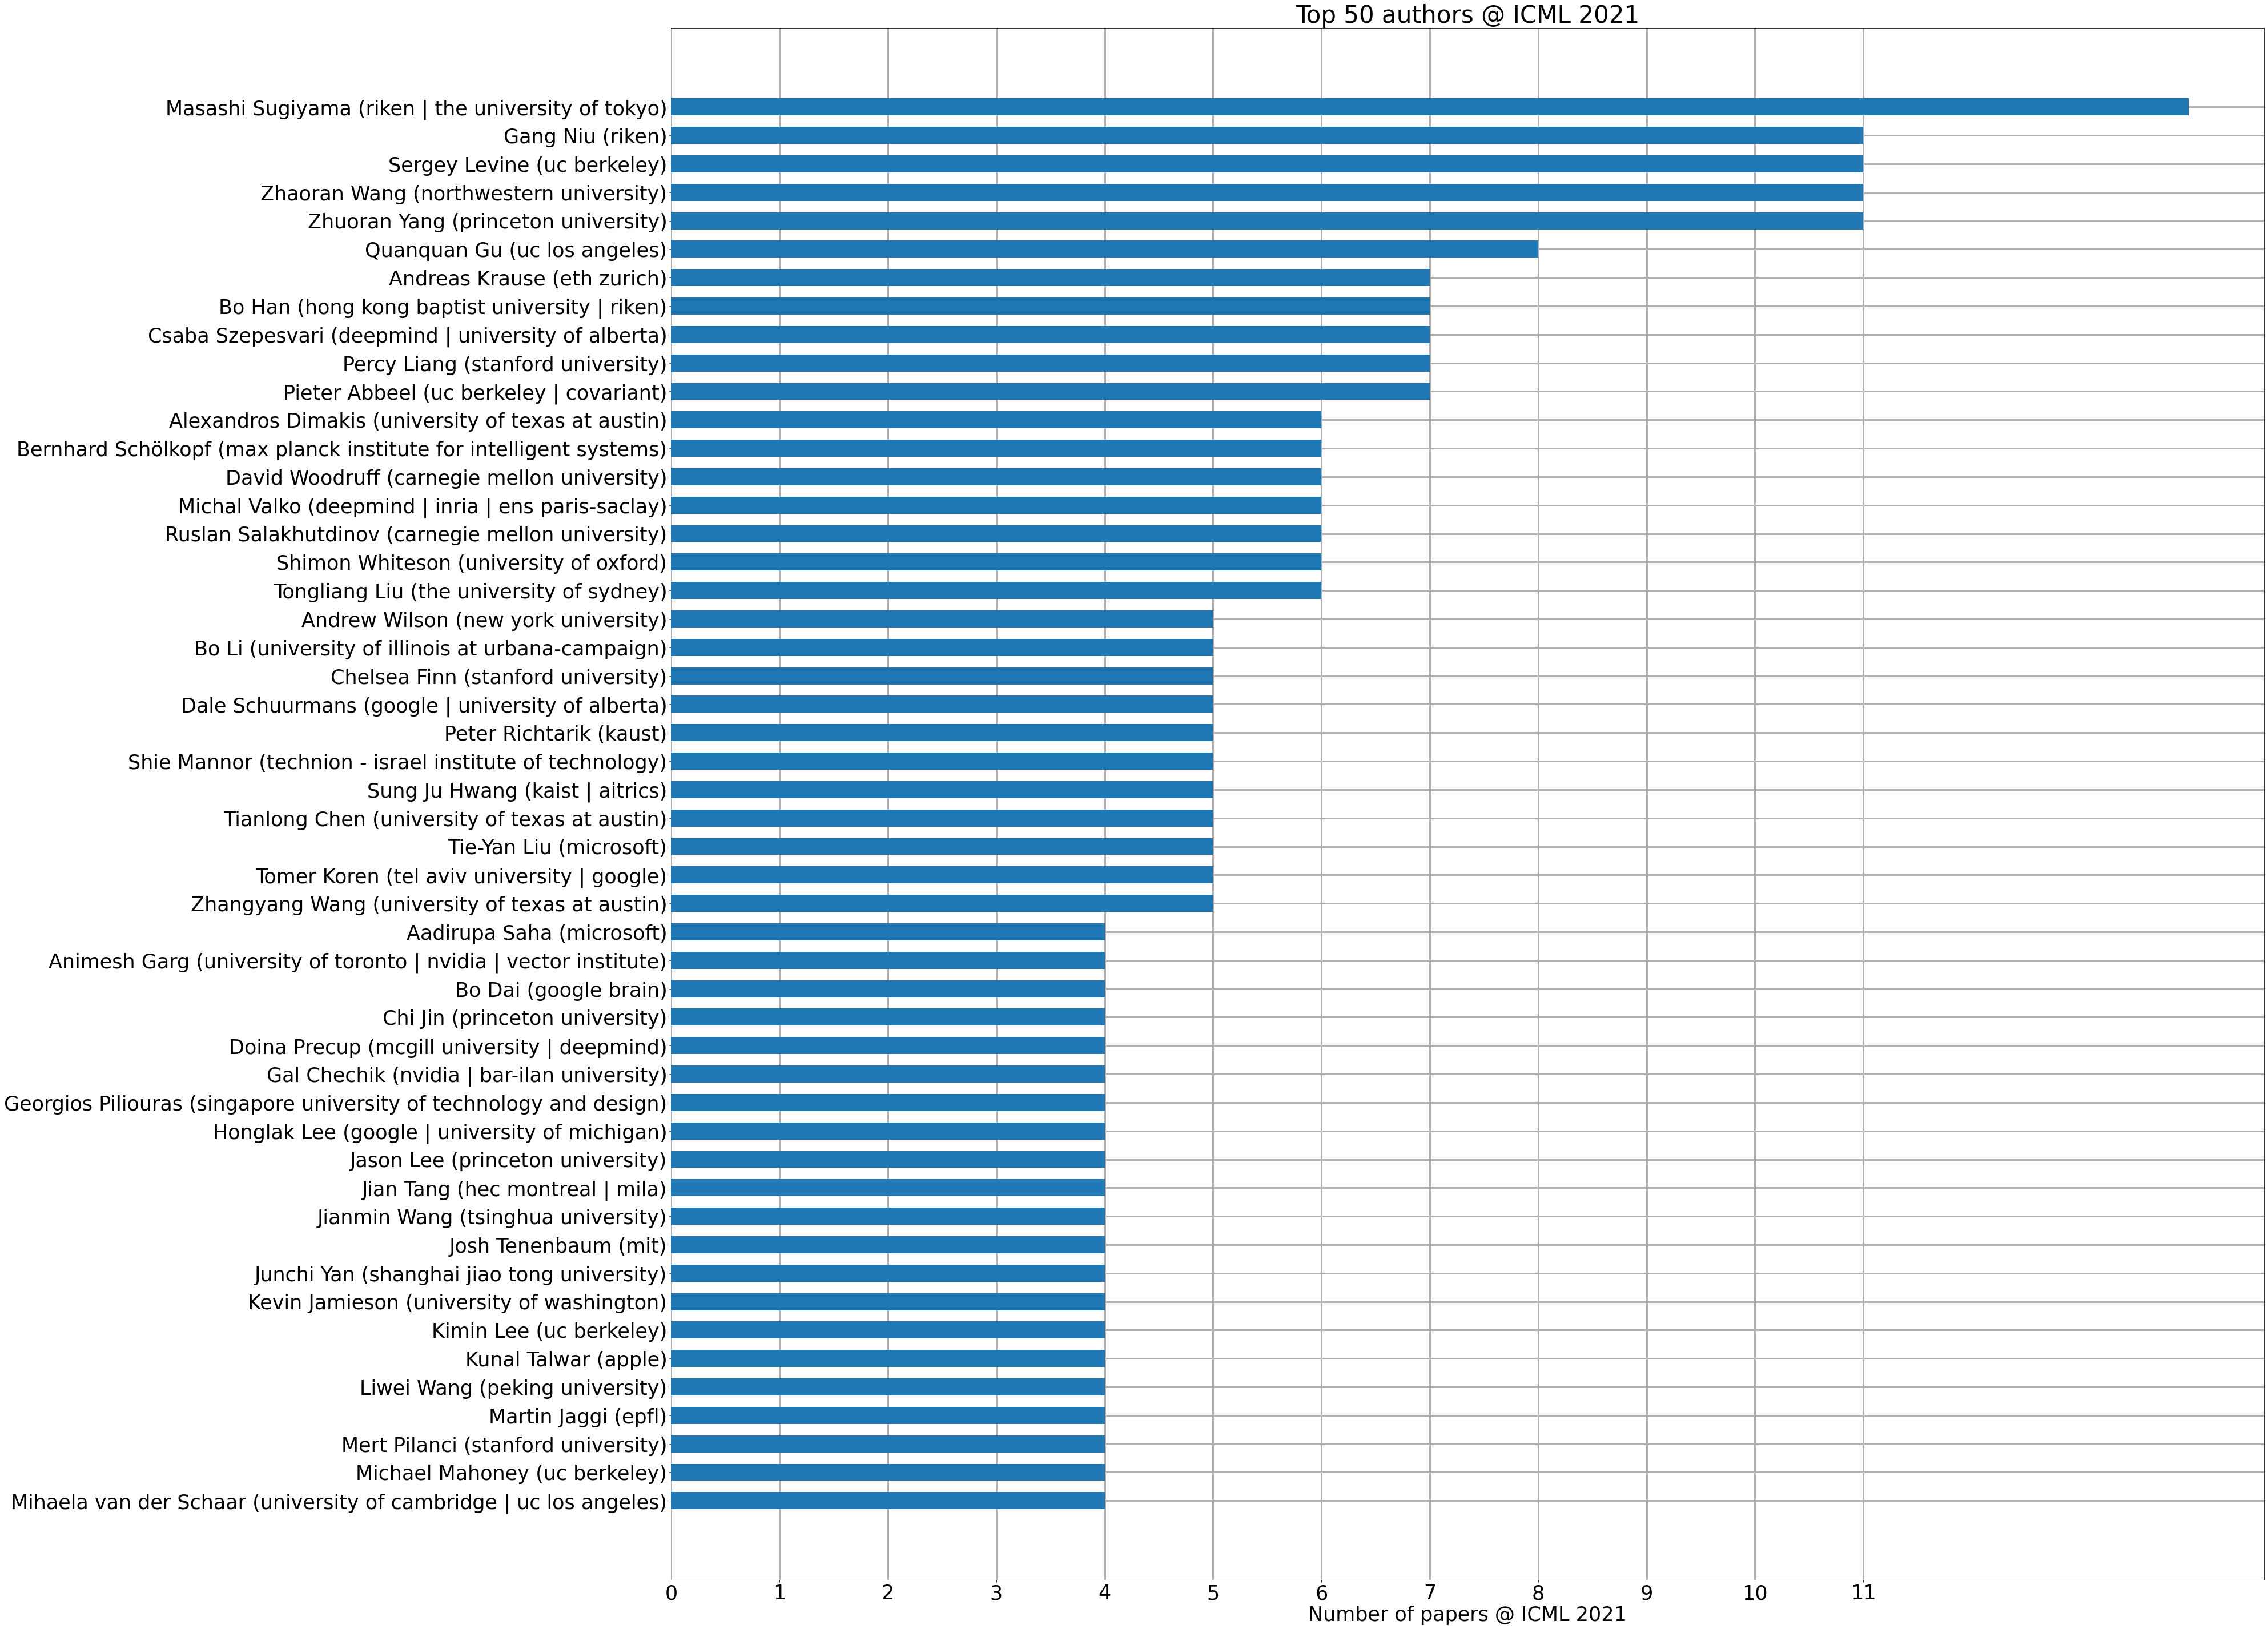

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 35})
fig, ax = plt.subplots()
fig.set_size_inches(50, 50)
top = 50
most_common = sorted_author_list[:top]
top_authors = [obj[0] for obj in most_common]
paper_counts = [obj[1] for obj in most_common]
x = ax.barh(np.arange(0, 250, 5), paper_counts, height=3., align='center', zorder=3)

ax.set_yticks(np.arange(0, 250, 5))
ax.set_yticklabels(top_authors)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xticks(list(range(0, 12)))
ax.set_xlabel('Number of papers @ ICML 2021')
ax.set_title(f'Top {top} authors @ ICML 2021')

ax.grid(linewidth=3)
fig.savefig('icml_stats_authortop50.svg', bbox_inches='tight')
plt.show()

In [14]:
sorted_author_list

[['Masashi Sugiyama (riken | the university of tokyo)', 14],
 ['Gang Niu (riken)', 11],
 ['Sergey Levine (uc berkeley)', 11],
 ['Zhaoran Wang (northwestern university)', 11],
 ['Zhuoran Yang (princeton university)', 11],
 ['Quanquan Gu (uc los angeles)', 8],
 ['Andreas Krause (eth zurich)', 7],
 ['Bo Han (hong kong baptist university | riken)', 7],
 ['Csaba Szepesvari (deepmind | university of alberta)', 7],
 ['Percy Liang (stanford university)', 7],
 ['Pieter Abbeel (uc berkeley | covariant)', 7],
 ['Alexandros Dimakis (university of texas at austin)', 6],
 ['Bernhard Schölkopf (max planck institute for intelligent systems)', 6],
 ['David Woodruff (carnegie mellon university)', 6],
 ['Michal Valko (deepmind | inria | ens paris-saclay)', 6],
 ['Ruslan Salakhutdinov (carnegie mellon university)', 6],
 ['Shimon Whiteson (university of oxford)', 6],
 ['Tongliang Liu (the university of sydney)', 6],
 ['Andrew Wilson (new york university)', 5],
 ['Bo Li (university of illinois at urbana-cam